In [1]:
from pylab import *
from utility_bfsolver import *
%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=12)

# 0. Define BF Calc with 3 possible defination of X

In [2]:
tb        = BFCalc_Toolbox()
# defining bfCalc
df_acc    = tb.IO_LoadAccTableIntoDf()
xs        = 832 + 35.6
usetag    = "1b"

a_mm   = df_acc.loc[(df_acc.sel=="mumu")  & (df_acc.tag==usetag),'acc'].values[0]
a_mt   = df_acc.loc[(df_acc.sel=="mutau") & (df_acc.tag==usetag),'acc'].values[0]
a_em   = df_acc.loc[(df_acc.sel=="emu")   & (df_acc.tag==usetag),'acc'].values[0]
a_mh   = df_acc.loc[(df_acc.sel=="mu4j")  & (df_acc.tag==usetag),'acc'].values[0]
eff    = np.ones_like(a_mm)

bf0    = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh,
                               eff*a_mm, a_mm +  a_mt+ a_em+ a_mh , 
                               xs=xs, lumin=35700, IsBinomial = True)

bf1    = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh,
                               eff*a_mm, a_mm + a_mh ,
                               xs=xs, lumin=35700, IsBinomial = True)

bf2    = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh,
                               eff*a_mm, a_mh , 
                               xs=xs, lumin=35700, IsBinomial = False)

initiate BFCalc_Toolbox


# 1. Generate Toys with SmearOfSubN

------- X=mm/all ------
From 10k Toys : x=0.09069+/-0.00034, r=0.9999+/-0.0226
AnaCalculation: x=0.09069+/-0.02246, r=1.0000+/-0.0225
-------------
------- X=mm/mm+mh ------
From 10k Toys : x=0.10517+/-0.00040, r=0.9999+/-0.0185
AnaCalculation: x=0.10517+/-0.01838, r=1.0000+/-0.0184
-------------
------- X=mm/mh ------
From 10k Toys : x=0.11753+/-0.00049, r=1.0000+/-0.0185
AnaCalculation: x=0.11753+/-0.01838, r=1.0000+/-0.0184
-------------


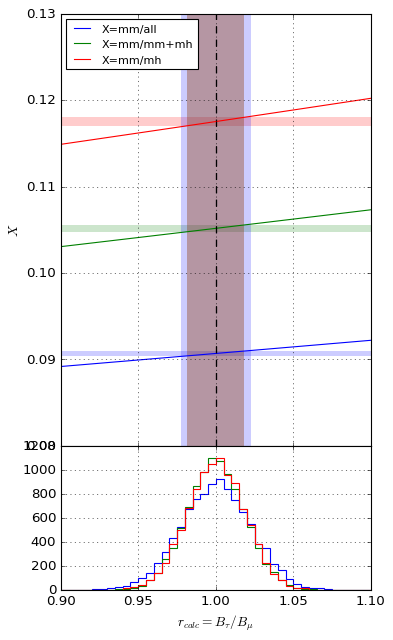

In [3]:
tb.Plot_Error_rTreuIsOne_GenerateToys_SmearOfSubN([bf0,bf1,bf2],
                                                  ['X=mm/all','X=mm/mm+mh','X=mm/mh'],
                                                  0.08,0.13)

# 2. Testing the two methods of Error estimation 

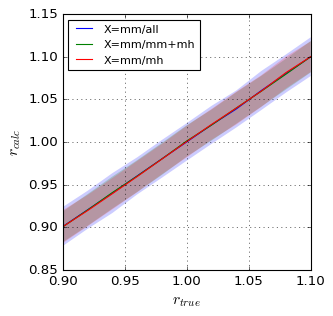

In [4]:
tb.Plot_Error_rTrueRange_GenerateToys_SmearOfSubN([bf0,bf1,bf2],['X=mm/all','X=mm/mm+mh','X=mm/mh'])

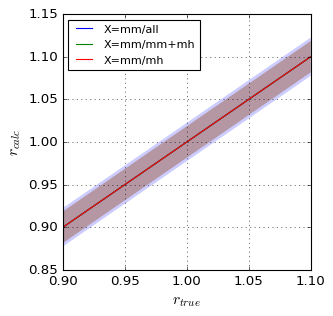

In [5]:
tb.Plot_Error_rTrueRange_ErrProp([bf0,bf1,bf2],['X=mm/all','X=mm/mm+mh','X=mm/mh'])

# 3. Sigma_r as function of score cut

## 3.1 The mumu

In [11]:
cuts = np.arange(0,0.4,0.01)
eff_list = tb.IO_GetEffAsMatrix(cuts,'mumu',usetag)

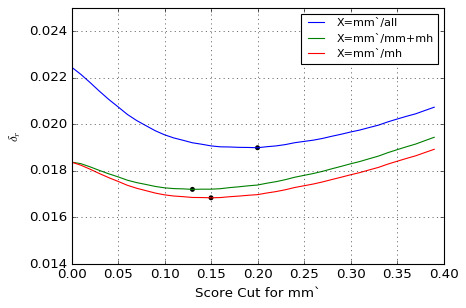

In [15]:
drs0,drs1,drs2 = [],[],[]
for eff in eff_list:
    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_mm, a_mm+a_mt+a_em+a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = True)
    dr,_,__=temp.PredictError(r=1)
    drs0.append(dr)

    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_mm, a_mm+a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = True)
    dr,_,__=temp.PredictError(r=1)
    drs1.append(dr)

    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_mm, a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = False)
    dr,_,__=temp.PredictError(r=1)
    drs2.append(dr)
    
plt.plot(cuts,drs0, label='X=mm`/all')
plt.scatter(cuts[np.argmin(drs0)],drs0[np.argmin(drs0)],marker='o',color='k',edgecolor='None')
plt.plot(cuts,drs1, label='X=mm`/mm+mh')
plt.scatter(cuts[np.argmin(drs1)],drs1[np.argmin(drs1)],marker='o',color='k',edgecolor='None')
plt.plot(cuts,drs2, label='X=mm`/mh')
plt.scatter(cuts[np.argmin(drs2)],drs2[np.argmin(drs2)],marker='o',color='k',edgecolor='None')


plt.legend(fontsize=10,loc='upper right')
plt.grid()
plt.ylim(0.014,0.025)
plt.xlim(0,0.4)
plt.xlabel('Score Cut for mm`')
plt.ylabel(r'$\delta_r$')
#plt.savefig("dr_cut.png",dpi=300)

## 3.2 The emu

In [16]:
cuts = np.arange(0,0.4,0.01)
eff_list = tb.IO_GetEffAsMatrix(cuts,'emu',usetag)

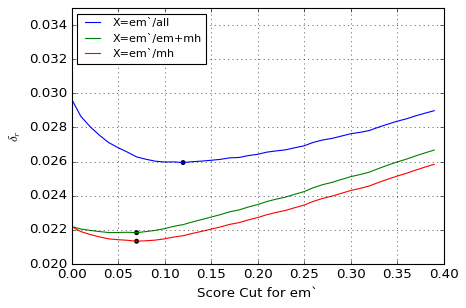

In [17]:
drs0,drs1,drs2 = [],[],[]
for eff in eff_list:
    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_em, a_mm+a_mt+a_em+a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = True)
    dr,_,__=temp.PredictError(r=1)
    drs0.append(dr)

    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_em, a_em+a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = True)
    dr,_,__=temp.PredictError(r=1)
    drs1.append(dr)

    temp = BFCalc_MultiSelectorX(a_mm, a_mt, a_em, a_mh, eff*a_em, a_mh, 
                                 xs=xs, lumin=35700, IsBinomial = False)
    dr,_,__=temp.PredictError(r=1)
    drs2.append(dr)
    
plt.plot(cuts,drs0, label='X=em`/all')
plt.scatter(cuts[np.argmin(drs0)],drs0[np.argmin(drs0)],marker='o',color='k',edgecolor='None')
plt.plot(cuts,drs1, label='X=em`/em+mh')
plt.scatter(cuts[np.argmin(drs1)],drs1[np.argmin(drs1)],marker='o',color='k',edgecolor='None')
plt.plot(cuts,drs2, label='X=em`/mh')
plt.scatter(cuts[np.argmin(drs2)],drs2[np.argmin(drs2)],marker='o',color='k',edgecolor='None')


plt.legend(fontsize=10,loc='upper left')
plt.grid()
plt.ylim(0.02,0.035)
plt.xlim(0,0.4)
plt.xlabel('Score Cut for em`')
plt.ylabel(r'$\delta_r$')
#plt.savefig("dr_cut.png",dpi=300)

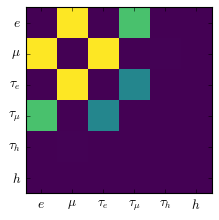

In [22]:
tb.Plot_ImshowMatrix(eff_list[10]*a_em)

# 4 Generate Toys with Smear of PDG Constent

------- X=mm/all ------
From 10k Toys : x=0.09069+/-0.00001, r=1.0000+/-0.0006
-------------
------- X=mm/mm+mh ------
From 10k Toys : x=0.10517+/-0.00012, r=1.0000+/-0.0059
-------------
------- X=mm/mh ------
From 10k Toys : x=0.11753+/-0.00015, r=1.0000+/-0.0058
-------------


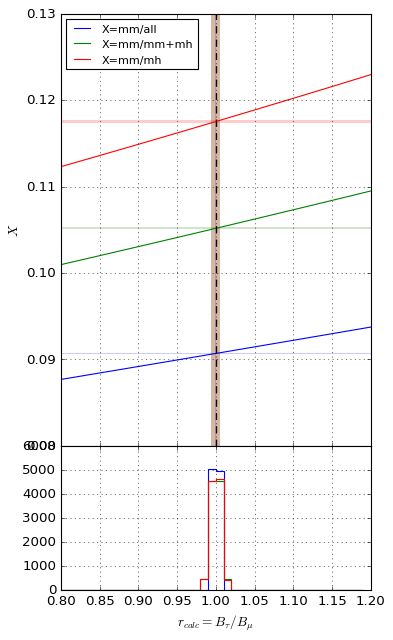

In [4]:
tb.Plot_Error_rTreuIsOne_GenerateToys_SmearOfConst([bf0,bf1,bf2],
                                                  ['X=mm/all','X=mm/mm+mh','X=mm/mh'],
                                                  0.08,0.13, smearBW=True, smearBt=False )
plt.savefig('r_calc_smearBW.png',dpi=200)

------- X=mm/all ------
From 10k Toys : x=0.09070+/-0.00246, r=0.9997+/-0.1621
-------------
------- X=mm/mm+mh ------
From 10k Toys : x=0.10515+/-0.00280, r=0.9978+/-0.1312
-------------
------- X=mm/mh ------
From 10k Toys : x=0.11755+/-0.00353, r=0.9988+/-0.1324
-------------


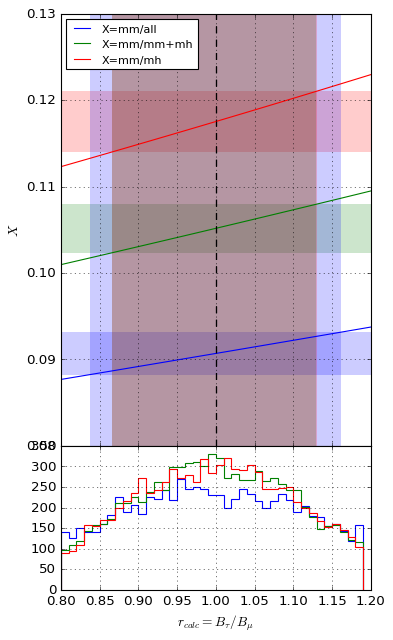

In [3]:
tb.Plot_Error_rTreuIsOne_GenerateToys_SmearOfConst([bf0,bf1,bf2],
                                                  ['X=mm/all','X=mm/mm+mh','X=mm/mh'],
                                                  0.08,0.13, smearBW=True, smearBt=False )
plt.savefig('r_calc_smearBW2.png',dpi=200)



------- X=mm/all ------
From 10k Toys : x=0.09069+/-0.00005, r=1.0000+/-0.0031
-------------
------- X=mm/mm+mh ------
From 10k Toys : x=0.10517+/-0.00005, r=1.0000+/-0.0025
-------------
------- X=mm/mh ------
From 10k Toys : x=0.11753+/-0.00007, r=1.0000+/-0.0025
-------------


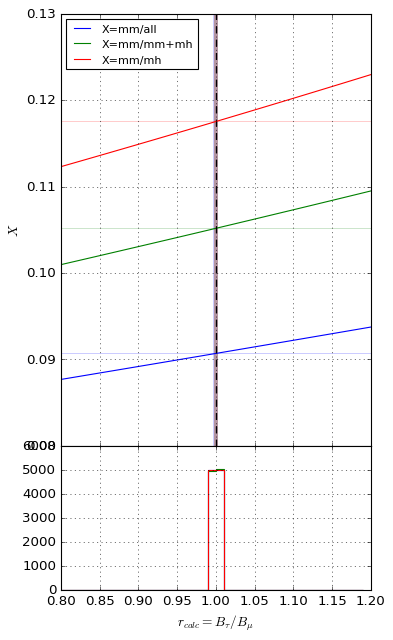

In [5]:
tb.Plot_Error_rTreuIsOne_GenerateToys_SmearOfConst([bf0,bf1,bf2],
                                                  ['X=mm/all','X=mm/mm+mh','X=mm/mh'],
                                                  0.08,0.13, smearBW=False, smearBt=True)
plt.savefig('r_calc_smearBt.png',dpi=200)